In [1]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,power_transform
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/master/ibm-hr-analytics-employee-attrition-performance.zip")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 35)

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


0.0    1233
1.0     237
Name: Attrition, dtype: int64

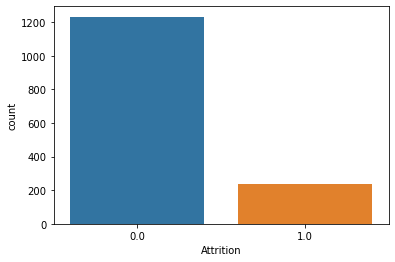

In [8]:
sns.countplot(df['Attrition'])
df['Attrition'].value_counts()

In [9]:
correlations = df.corr()['Attrition'].sort_values(ascending=False)
print(correlations)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

<AxesSubplot:>

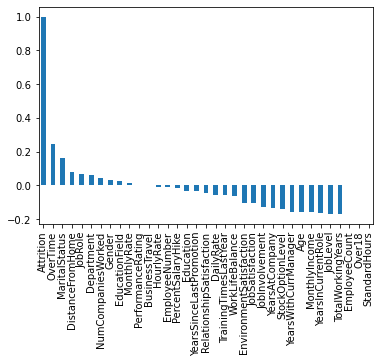

In [10]:
correlations.plot(kind='bar')

In [11]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


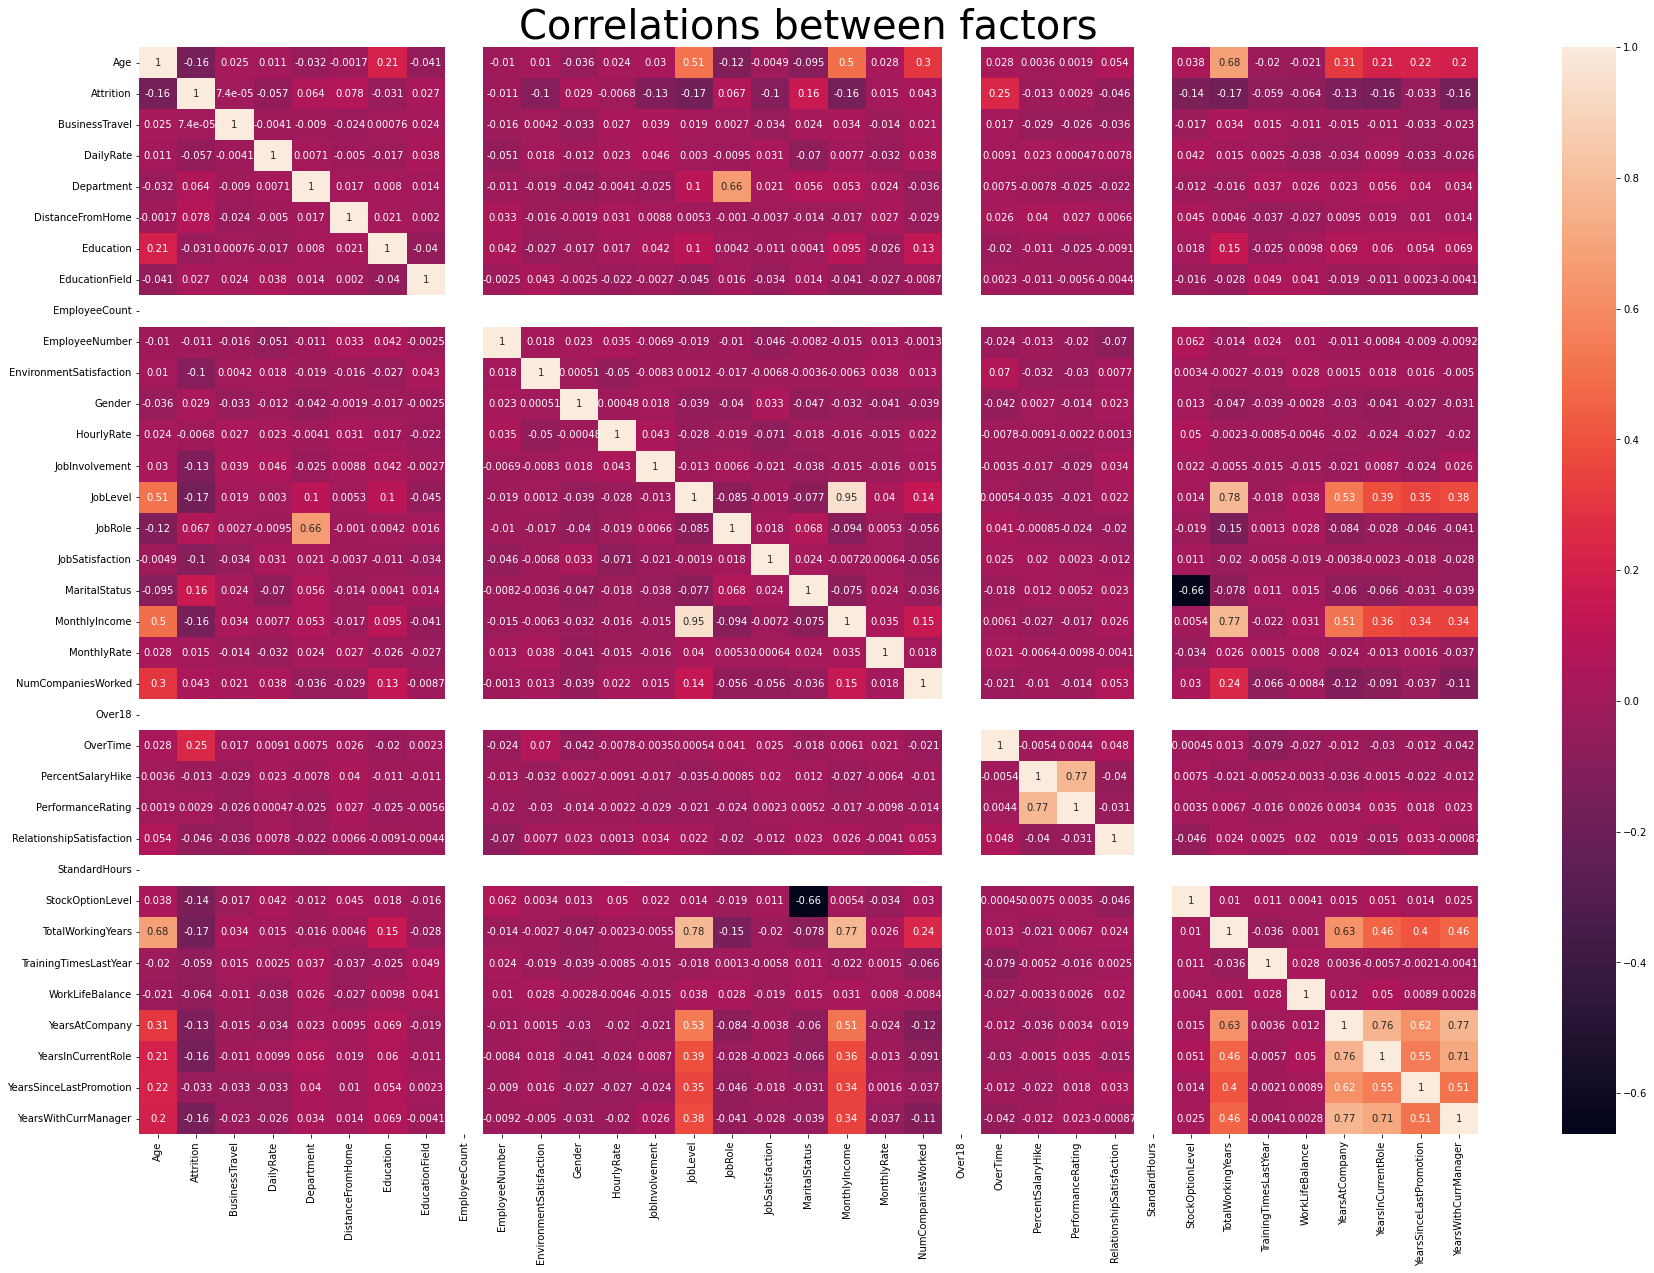

In [12]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=40)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [13]:
#From all these features, we are going to select the ones with bigger numbers since these are the ones that will give us more information. To do so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant and not provide information at all.

In [14]:
print(abs(correlations) > 0.2)

Attrition                    True
OverTime                     True
MaritalStatus               False
DistanceFromHome            False
JobRole                     False
Department                  False
NumCompaniesWorked          False
Gender                      False
EducationField              False
MonthlyRate                 False
PerformanceRating           False
BusinessTravel              False
HourlyRate                  False
EmployeeNumber              False
PercentSalaryHike           False
Education                   False
YearsSinceLastPromotion     False
RelationshipSatisfaction    False
DailyRate                   False
TrainingTimesLastYear       False
WorkLifeBalance             False
EnvironmentSatisfaction     False
JobSatisfaction             False
JobInvolvement              False
YearsAtCompany              False
StockOptionLevel            False
YearsWithCurrManager        False
Age                         False
MonthlyIncome               False
YearsInCurrent

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

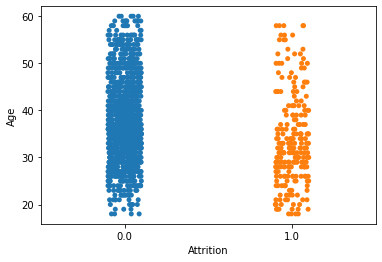

In [15]:
sns.stripplot(x='Attrition',y='Age', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyRate'>

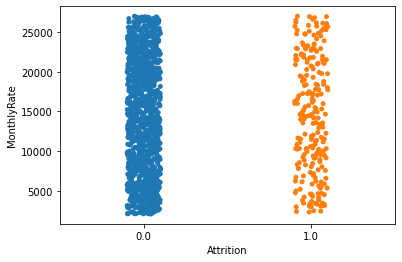

In [16]:
sns.stripplot(x='Attrition',y='MonthlyRate', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

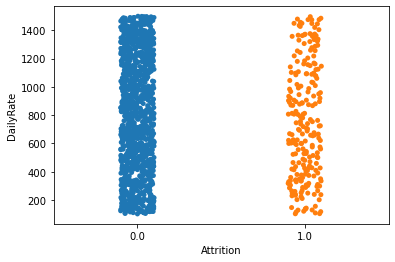

In [17]:
sns.stripplot(x='Attrition',y='DailyRate', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

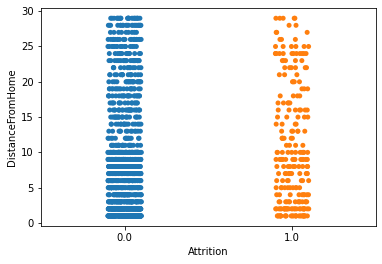

In [18]:
sns.stripplot(x='Attrition',y='DistanceFromHome', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

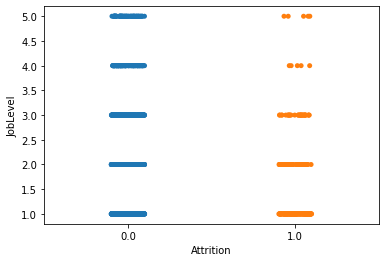

In [19]:
sns.stripplot(x='Attrition',y='JobLevel', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='Education'>

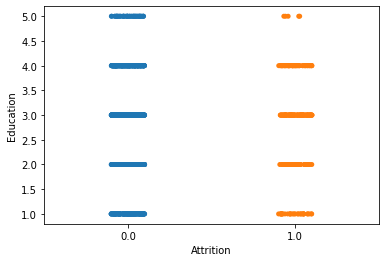

In [20]:
sns.stripplot(x='Attrition',y='Education', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

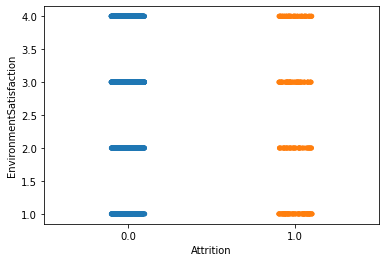

In [21]:
sns.stripplot(x='Attrition',y='EnvironmentSatisfaction', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

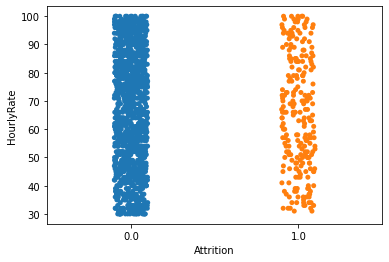

In [22]:
sns.stripplot(x='Attrition',y='HourlyRate', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

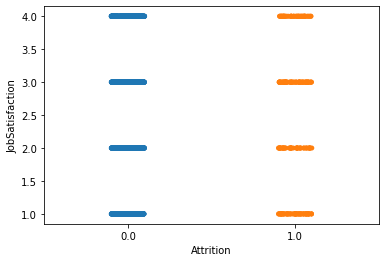

In [23]:
sns.stripplot(x='Attrition',y='JobSatisfaction', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='JobInvolvement'>

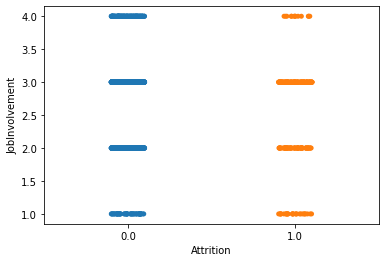

In [24]:
sns.stripplot(x='Attrition',y='JobInvolvement', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

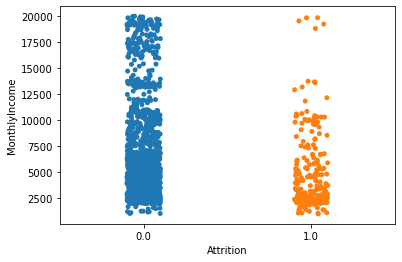

In [25]:
sns.stripplot(x='Attrition',y='MonthlyIncome', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

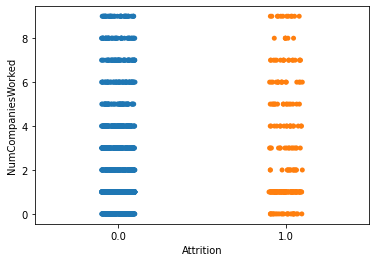

In [26]:
sns.stripplot(x='Attrition',y='NumCompaniesWorked', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

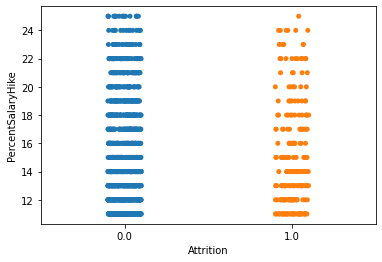

In [27]:
sns.stripplot(x='Attrition',y='PercentSalaryHike', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='PerformanceRating'>

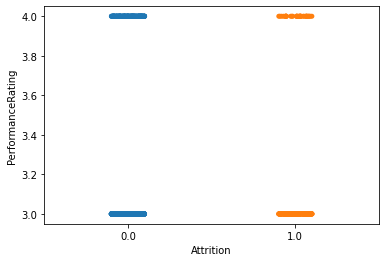

In [28]:
sns.stripplot(x='Attrition',y='PerformanceRating', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='RelationshipSatisfaction'>

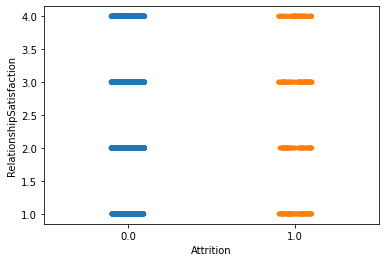

In [29]:
sns.stripplot(x='Attrition',y='RelationshipSatisfaction', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='StandardHours'>

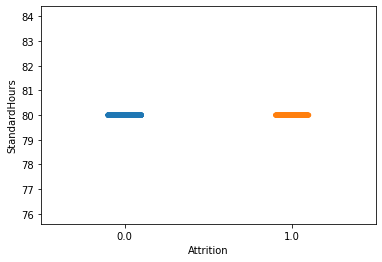

In [30]:
sns.stripplot(x='Attrition',y='StandardHours', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='StockOptionLevel'>

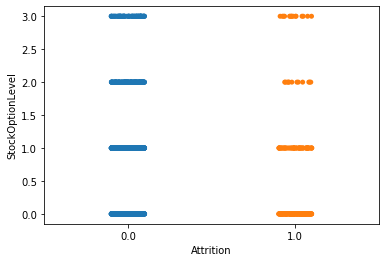

In [31]:
sns.stripplot(x='Attrition',y='StockOptionLevel', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

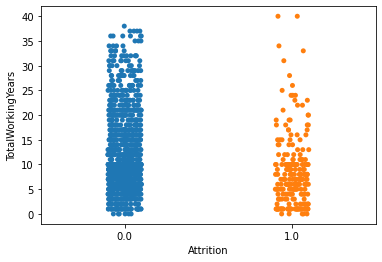

In [32]:
sns.stripplot(x='Attrition',y='TotalWorkingYears', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='TrainingTimesLastYear'>

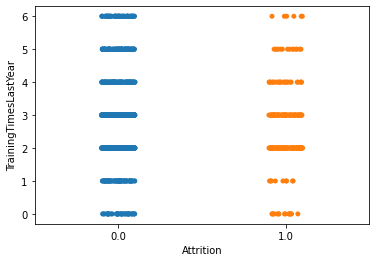

In [33]:
sns.stripplot(x='Attrition',y='TrainingTimesLastYear', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='WorkLifeBalance'>

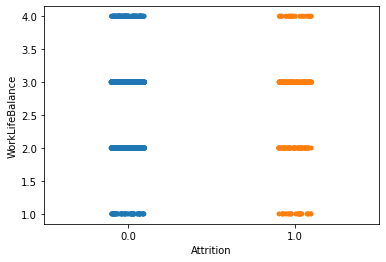

In [34]:
sns.stripplot(x='Attrition',y='WorkLifeBalance', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

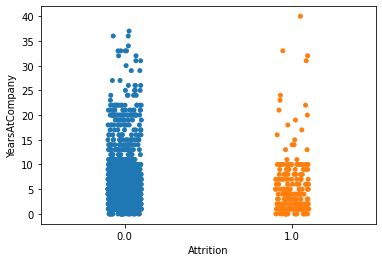

In [35]:
sns.stripplot(x='Attrition',y='YearsAtCompany', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

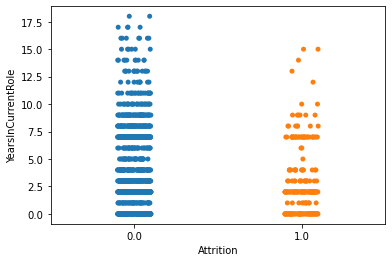

In [36]:
sns.stripplot(x='Attrition',y='YearsInCurrentRole', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

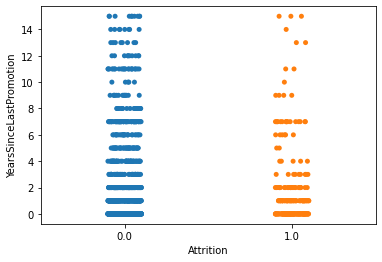

In [37]:
sns.stripplot(x='Attrition',y='YearsSinceLastPromotion', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

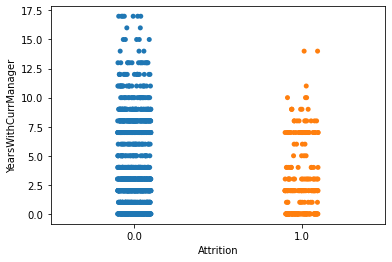

In [38]:
sns.stripplot(x='Attrition',y='YearsWithCurrManager', data=df)

In [39]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [40]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

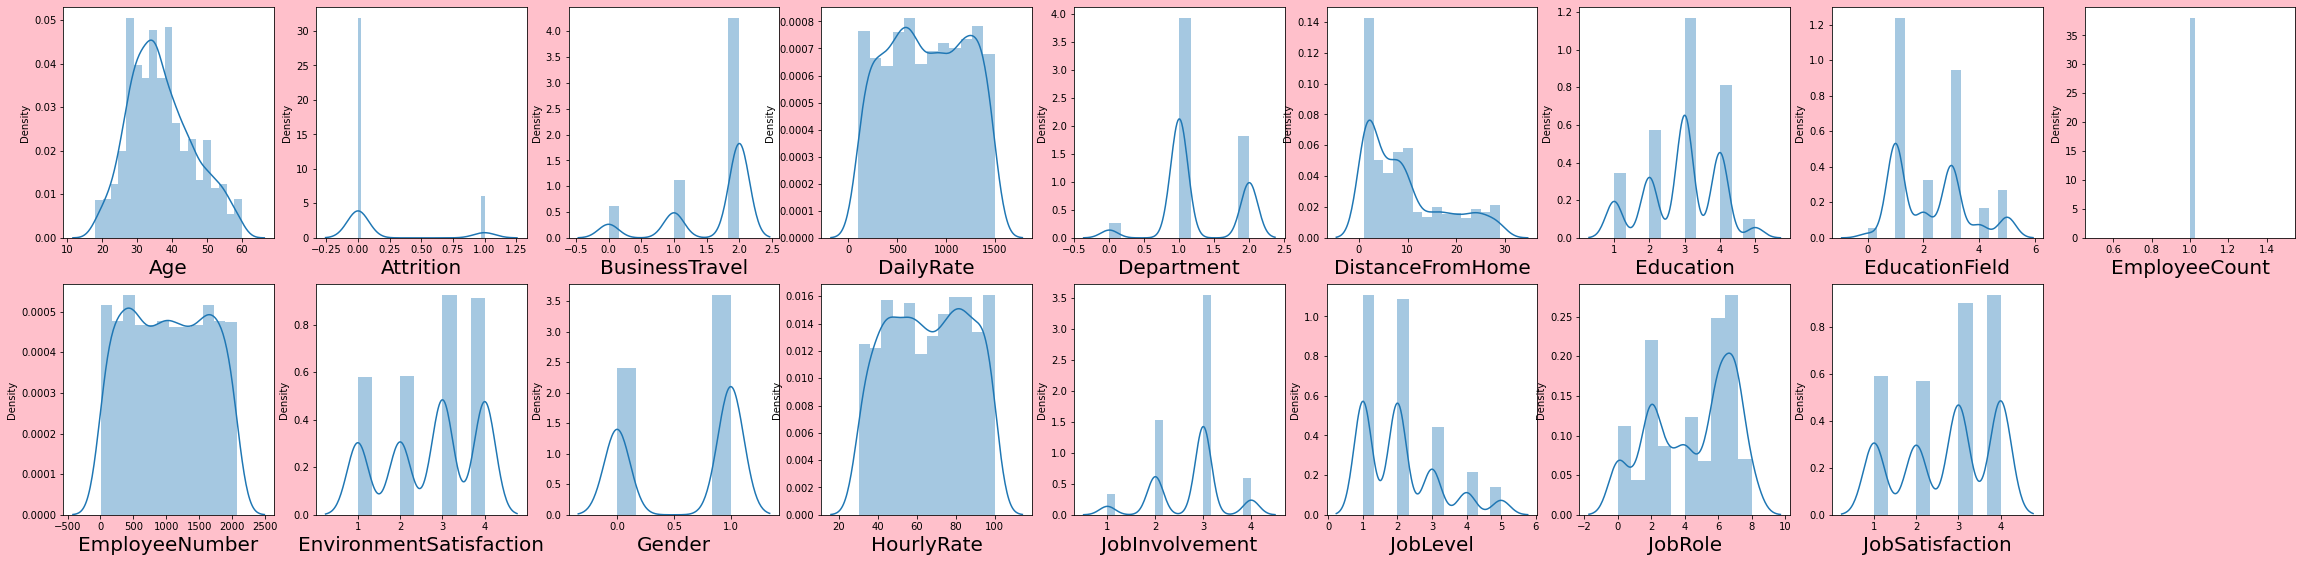

In [41]:
#lets visualize and analyse the data

plt.figure(figsize=(40,45),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax = plt.subplot(9,9,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [42]:
x_new=power_transform(X)

In [43]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

21    0.964489
32    0.212129
22    0.116250
13    0.103624
26    0.087019
28    0.058058
17    0.032831
19    0.014814
3     0.013801
7     0.000000
25    0.000000
23    0.000000
20    0.000000
4    -0.007468
0    -0.007603
6    -0.008386
30   -0.008683
27   -0.010653
29   -0.012286
12   -0.020365
31   -0.060849
33   -0.067565
5    -0.099881
11   -0.106461
16   -0.156911
18   -0.184087
24   -0.193634
2    -0.196160
9    -0.205395
15   -0.212815
8    -0.288025
14   -0.319659
10   -0.408665
1    -0.970506
dtype: float64

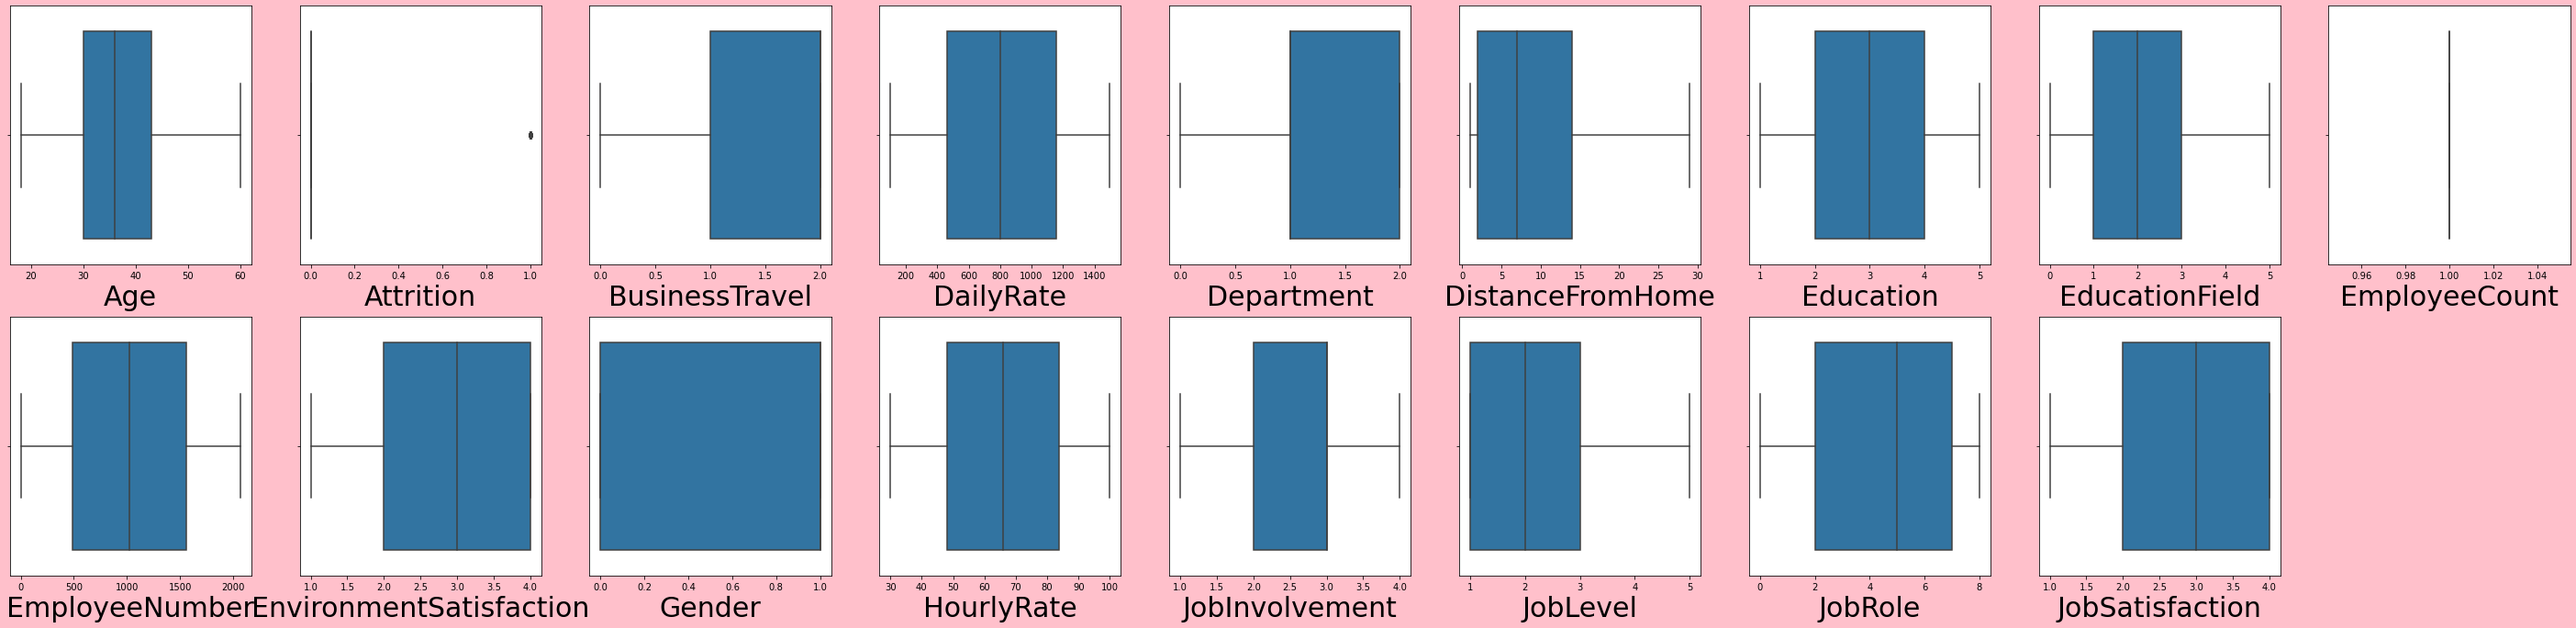

In [44]:
plt.figure(figsize=(50,55),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax = plt.subplot(9,9,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.show()

In [45]:
#as we can see by the boxplot that there is no outliers present...so we are good to go ahead

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
X_scaled.shape[1]

34

In [48]:
vif=pd.DataFrame()

In [49]:
vif["vif"]= [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [50]:
vif["Features"]=X.columns
vif

,vif,Features
0,2.054226,Age
1,1.016808,BusinessTravel
2,1.026401,DailyRate
3,1.942165,Department
4,1.018096,DistanceFromHome
5,1.065295,Education
6,1.016240,EducationField
7,NaN,EmployeeCount
8,1.022699,EmployeeNumber
9,1.018022,EnvironmentSatisfaction


In [58]:
X_scaled.shape

(1470, 34)

0.0    1233
1.0     237
Name: Attrition, dtype: int64

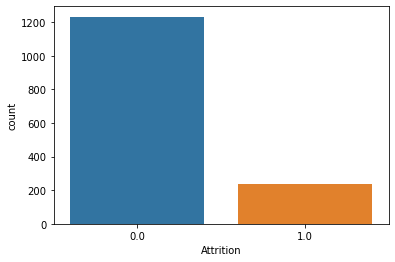

In [59]:
sns.countplot(df['Attrition'])
df['Attrition'].value_counts()

In [65]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_classes=3,
                           n_informative=4, weights=[0.2, 0.3, 0.5],
                           random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
brfc= BalancedRandomForestClassifier(max_depth=2, random_state=0)
brfc.fit(X_train, y_train)  
BalancedRandomForestClassifier()
y_pred = brfc.predict(X_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test,y_pred))

confusion matrix: [[41  7  6]
 [10 62 12]
 [23 28 61]]
accuracy score: 0.656


In [66]:
brfcscore=cross_val_score(brfc,X,y,cv=5)
c=brfcscore.mean()
print('cross val score:',c*100)

cross val score: 65.5


In [67]:
from sklearn.datasets import make_classification
from imblearn.ensemble import EasyEnsembleClassifier 
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train) 
EasyEnsembleClassifier()
y_pred = eec.predict(X_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test,y_pred))

confusion matrix: [[ 23   0]
 [  2 225]]
accuracy score: 0.992


In [68]:
from imblearn.ensemble import BalancedBaggingClassifier 
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
bbc = BalancedBaggingClassifier(random_state=42)
bbc.fit(X_train, y_train) 
BalancedBaggingClassifier(...)
y_pred = bbc.predict(X_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test,y_pred))

confusion matrix: [[ 23   0]
 [  2 225]]
accuracy score: 0.992


In [69]:
bbcscore=cross_val_score(bbc,X,y,cv=5)
c=bbcscore.mean()
print('cross val score:',c*100)

cross val score: 99.4


In [70]:
for i in range(0,100):
    x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=i)
    reg=LogisticRegression()
    reg.fit(x_train,y_train)
    pred_train = reg.predict(x_train)
    y_pred= reg.predict(x_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-0.99875
At random state0,the testing accuracy is:-1.0


At random state1,the training accuracy is:-1.0
At random state1,the testing accuracy is:-0.995


At random state2,the training accuracy is:-0.99875
At random state2,the testing accuracy is:-0.995


At random state3,the training accuracy is:-0.99875
At random state3,the testing accuracy is:-0.995


At random state4,the training accuracy is:-0.99875
At random state4,the testing accuracy is:-1.0


At random state5,the training accuracy is:-1.0
At random state5,the testing accuracy is:-0.995


At random state6,the training accuracy is:-0.99875
At random state6,the testing accuracy is:-1.0


At random state7,the training accuracy is:-1.0
At random state7,the testing accuracy is:-0.995


At random state8,the training accuracy is:-1.0
At random state8,the testing accuracy is:-0.99


At random state9,the training accuracy is:-0.99875
At random state9,the testing accuracy is:-0.99


At random stat

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [111]:
X_train.shape

(800, 20)

In [112]:
y_train.shape

(800,)

In [113]:
X_test.shape

(200, 20)

In [114]:
y_test.shape

(200,)

In [115]:
#model accuracy
accuracy=accuracy_score(y_pred,y_test)
accuracy

1.0

In [116]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat


array([[ 19,   0],
       [  0, 181]], dtype=int64)

In [117]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00       181

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



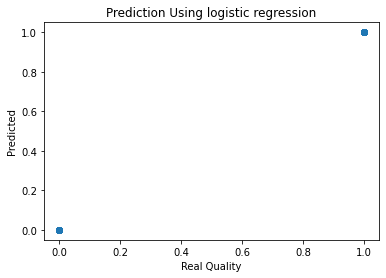

In [118]:
plt.scatter(y_test,y_pred)
plt.title("Prediction Using logistic regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

In [120]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(x_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

accuracy score: 100.0


In [121]:
dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

cross val score: 99.49999999999999


In [82]:
import xgboost as xgb
from xgboost import XGBClassifier
xg=XGBClassifier()

In [83]:
model=XGBClassifier()
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred=model.predict(x_test)
model_score=accuracy_score(y_test,y_pred)
print('accuracy score:',model_score*100)

modelscore=cross_val_score(xg,X,y,cv=5)
xgr=modelscore.mean()
print('cross val score:',xgr*100)

accuracy score: 100.0
cross val score: 99.60000000000001


In [84]:
parameters={"colsample_bytree": [0.7, 1],
    "gamma": [0, 0.5],
    "learning_rate": [0.1, 0.3], 
    "max_depth": [2, 3],
    "n_estimators": [100, 150],
    "subsample": [0.6, 1]}

clf=GridSearchCV(xg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.6}


In [85]:
xg=XGBClassifier(colsample_bytree= 0.7,gamma= 0, learning_rate=0.1, max_depth=2, n_estimators=100, subsample=0.6)
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred=model.predict(x_test)
model_score=accuracy_score(y_test,y_pred)
print('accuracy score:',model_score*100)

modelscore=cross_val_score(xg,X,y,cv=5)
xgr=modelscore.mean()
print('cross val score:',xgr*100)

accuracy score: 100.0
cross val score: 99.70000000000002


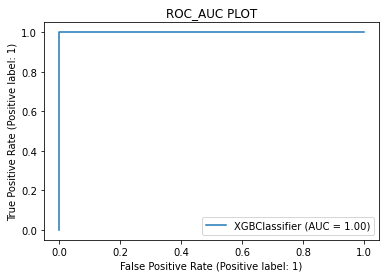

In [86]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,x_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

In [87]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
parameters ={'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"],'max_depth':[4,5,6,7,8]}

In [88]:
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}


In [89]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred=rf.predict(x_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 100.0
cross val score: 99.70000000000002


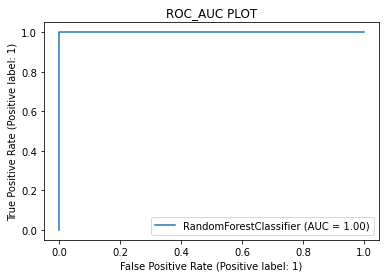

In [90]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,x_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

In [91]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
y_pred=gnb.predict(x_test)
gnb_score=accuracy_score(y_test,y_pred)
print('accuracy score:',gnb_score*100)

accuracy score: 100.0


In [92]:
score=cross_val_score(gnb,X,y,cv=5)
cvs=score.mean()
print('cross val score:',cvs*100)

cross val score: 99.49999999999999


In [93]:
#so according to  dataset random forest classifier  is getting best accuracy of 100%,which is best among all and cross validation score of 99.4%

In [ ]:
#so the AUC value according to this random forest clasifier is 0.98

In [ ]:
#saving the model to local file system
filename='_model.pickle'
pickle.dump(rf,open(filename,'wb'))